In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv("../../ML/data/housing.csv")
dataset.sample(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19002,-121.95,38.34,9.0,4999.0,874.0,2687.0,817.0,4.2324,142100.0,INLAND
5362,-118.41,34.03,36.0,3053.0,635.0,1234.0,577.0,5.1637,500001.0,<1H OCEAN
14390,-117.23,32.74,35.0,2615.0,525.0,1312.0,547.0,4.1339,238200.0,NEAR OCEAN
8860,-118.37,34.06,36.0,1661.0,395.0,690.0,365.0,3.3438,500001.0,<1H OCEAN
8956,-118.38,34.01,18.0,9528.0,2075.0,3922.0,1920.0,4.7612,304100.0,<1H OCEAN


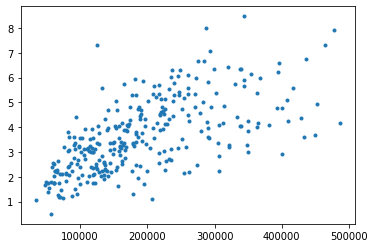

In [17]:
#dataset
dataset = dataset.loc[dataset['median_house_value'] < 500000]

dataset = dataset.sample(300)

x = dataset['median_house_value']
y = dataset['median_income']

plt.plot(x, y, '.')


In [18]:
def cost_function(x, y, weight, bias):
    #Mean squared error
    total_error = 0.0
    n = len(x)
    for i in range(n):
        total_error += (y[i] - ((weight*x[i]) + bias))**2
        
    return total_error/n
        

In [19]:
def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    n = len(x)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (weight*x[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*x[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / y) * learning_rate
    bias -= (bias_deriv / y) * learning_rate

    return weight, bias

In [20]:
def train(x, y, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(x, y, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history

In [25]:
train(list(x), list(y), 1, 1, 0.01, 100)
#print(type(list(x)))

TypeError: unsupported operand type(s) for /: 'float' and 'list'

In [30]:
print((list(x)))
print((list(y)))

[217000.0, 295300.0, 226300.0, 196600.0, 119000.0, 162800.0, 313900.0, 238600.0, 125000.0, 279900.0, 120000.0, 321600.0, 248000.0, 257500.0, 204500.0, 74100.0, 477800.0, 96400.0, 183300.0, 178100.0, 367100.0, 106400.0, 486800.0, 165300.0, 118800.0, 200000.0, 306700.0, 222000.0, 195000.0, 150600.0, 161000.0, 183900.0, 217800.0, 159800.0, 61300.0, 284900.0, 344000.0, 283000.0, 407200.0, 81400.0, 57000.0, 63400.0, 135400.0, 120200.0, 166800.0, 170200.0, 224800.0, 141400.0, 141700.0, 190100.0, 107400.0, 52500.0, 52000.0, 343600.0, 50000.0, 81800.0, 132800.0, 330700.0, 98100.0, 100000.0, 262500.0, 229100.0, 158200.0, 119700.0, 131300.0, 278300.0, 433300.0, 83200.0, 68300.0, 34200.0, 98600.0, 149000.0, 115600.0, 116200.0, 91700.0, 350000.0, 350000.0, 113600.0, 226500.0, 274300.0, 168300.0, 168100.0, 334100.0, 306700.0, 66100.0, 144000.0, 165300.0, 160100.0, 158500.0, 70800.0, 201700.0, 260900.0, 290000.0, 107000.0, 337900.0, 260900.0, 313100.0, 164200.0, 132300.0, 245000.0, 381500.0, 253900.